<a href="https://colab.research.google.com/github/berryaesi/CSEL-302-Introduction-to-Intelligent-System/blob/main/2B_TORRES_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Part 1: Data Loading and Preprocessing**

***1. Load the Dataset:***

In [ ]:
dataSet = pd.read_csv('onlinefoods.csv')

***2. Handle Missing Values:***

In [ ]:
# Identify missing values
missing_values = dataSet.isnull().sum()

# Handle missing values (e.g., by imputation or removal)
dataSet.dropna(inplace=True)

***3. Encode Categorical Variables:***

In [ ]:
dataSet['Output'] = dataSet['Output'].map({'Yes': 1, 'No': 0})
dataSet['Feedback'] = dataSet['Feedback'].map({'Positive': 1, 'Negative': 0})
dataSet['Monthly_Income'] = dataSet['Monthly Income'].map({'10001-25000': 1, 'More than 50000': 1, 'Below Rs. 10000': 0})

In [ ]:
ds_dummy = pd.get_dummies(dataSet, drop_first=True)

In [ ]:
ds_dummy['customFB'] = (ds_dummy['Feedback']>0).astype(int)

***4. Feature Selection: ***

In [ ]:
X = ds_dummy.drop(['Age', 'Monthly_Income', 'Family size', 'Output', 'Feedback','customFB'],  axis = 1)
y = ds_dummy['customFB']

# **Part 2: Exploratory Data Analysis**

***1. Descriptive Statistics:***

In [ ]:
# Descriptive statistics for numeric columns
dataSet.describe()

,Age,Family size,latitude,longitude,Pin code,Output,Feedback,Monthly_Income
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,317.0,62.0
mean,24.628866,3.280928,12.972058,77.600160,560040.113402,0.775773,1.0,1.0
std,2.975593,1.351025,0.044489,0.051354,31.399609,0.417611,0.0,0.0
min,18.000000,1.000000,12.865200,77.484200,560001.000000,0.000000,1.0,1.0
25%,23.000000,2.000000,12.936900,77.565275,560010.750000,1.000000,1.0,1.0
50%,24.000000,3.000000,12.977000,77.592100,560033.500000,1.000000,1.0,1.0
75%,26.000000,4.000000,12.997025,77.630900,560068.000000,1.000000,1.0,1.0
max,33.000000,6.000000,13.102000,77.758200,560109.000000,1.000000,1.0,1.0


***2. Visualizations:***

<ipython-input-17-28742488d638>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='customFB', data=ds_dummy, ci=None)


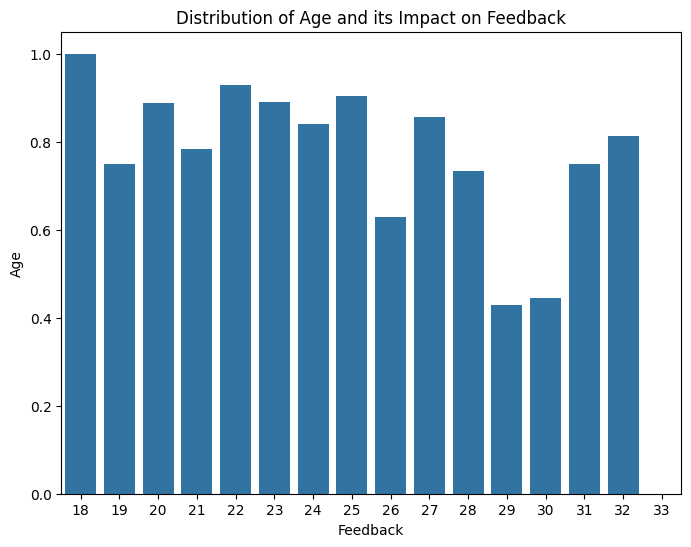

In [ ]:
# Boxplot of Age vs. Feedback
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='customFB', data=ds_dummy, ci=None)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

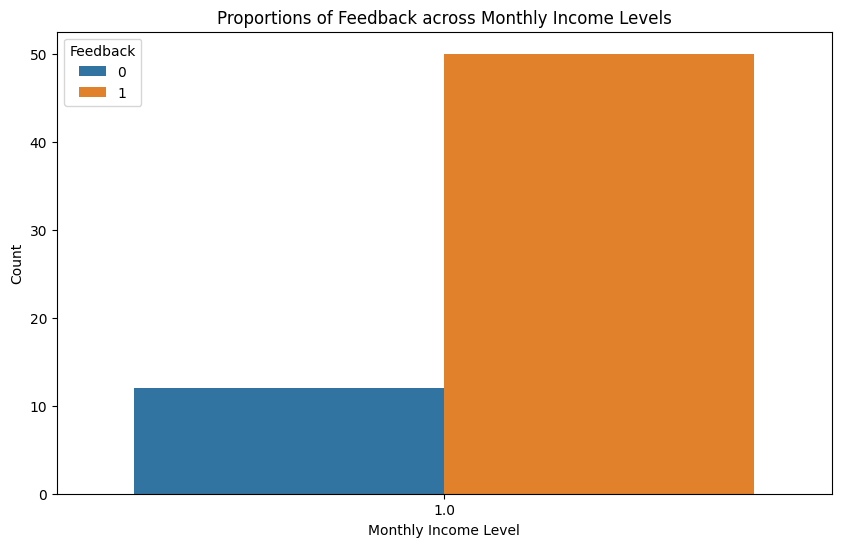

In [ ]:
# Countplot of Feedback across Monthly Income Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Income', hue='customFB', data=ds_dummy)
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income Level')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

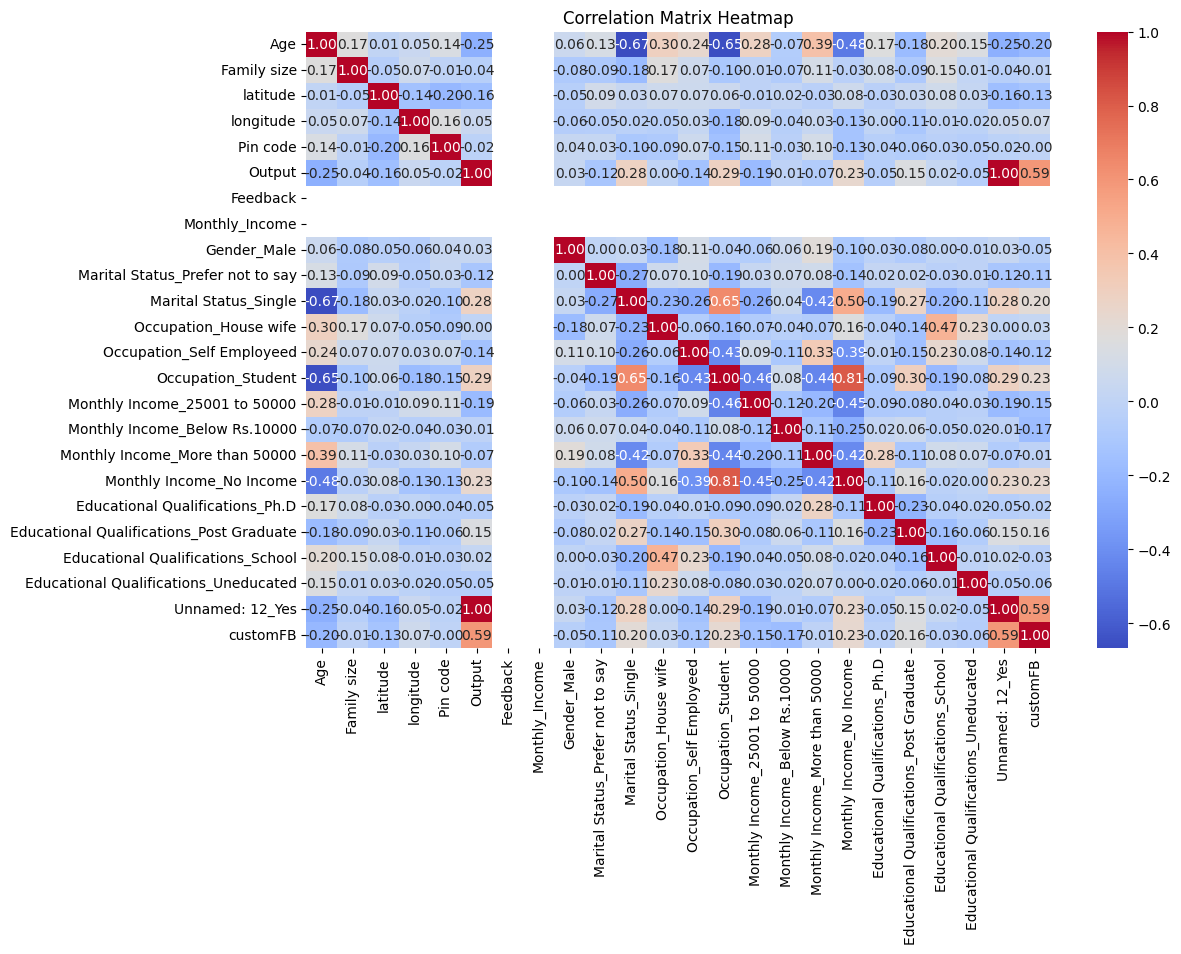

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ds_dummy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model.**

***1. Build the Model:***

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Build the logistic regression model
scaler = StandardScaler()
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

***2. Model Evaluation:***

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
[[ 0 11]
 [ 0 67]]


# **Part 4: Data Analysis and Visualization**

***1. Feature Importance:***

<ipython-input-34-fd3f70ce1d4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='viridis')


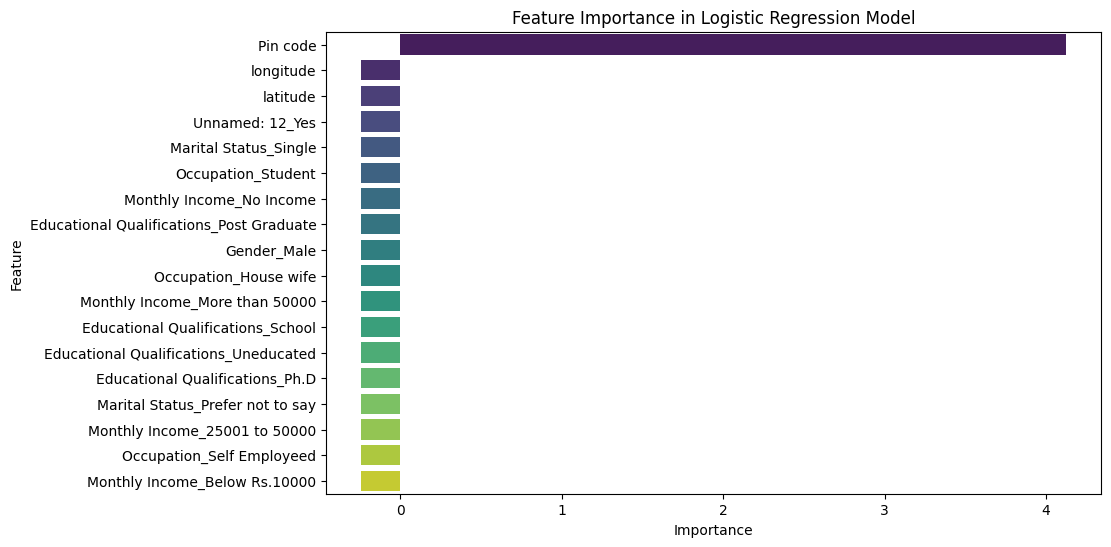

In [ ]:
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
feat_importance['Importance'] = scaler.fit_transform(feat_importance['Importance'].values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

***2. Prediction Insights:***

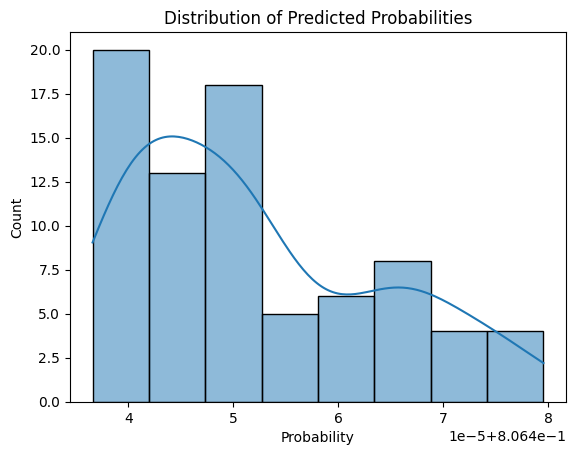

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()